## USP - EACH - SIN5007 - Reconhecimento de Padrões - 1º SEM 2020

## Classificação de Modelos cardíacos tridimensionais relacionada à presença ou ausência de cardimiopatia


**Grupo H(8):** <br />
Diego Dedize <br />
Luiz Gustavo Silva <br />
Vagner Mendonça Gonçalves <br />

version 0.2 - 16/04/2020

**Objetivo:** aplicar modelos de classificação  e avaliar os resultados obtidos em um dataset composto por vetores de características extraídas de modelos 3D reconstruídos a partir de exames de Ressonancia Magnética Cardíaca (RMC).

**Cardiomiopatia:** quadro clínico dado por uma anormalidade no miocárdio (estrutura muscular do coração) (KUMAR et al., 2010 apud BERGAMASCO, 2018).

**Fonte dos dados:** Dataset disponibilizado pelo Laboratório de Aplicações de Informática em Saúde (LApIS) - EACH/USP, coordenado pela Profa. Dra. Fátima L. S. Nunes.

**Referências:** <br />
BERGAMASCO, Leila Cristina Carneiro. Recuperação de imagens cardíacas tridimensionais por conteúdo. 2013. 134 f. Dissertação (Mestrado em Ciências) - Programa de Pós-graduação em Sistemas de Informação, Escola de Artes, Ciências e Humanidades, Universidade de São Paulo, São Paulo, 2013. 

BERGAMASCO, Leila Cristina Carneiro. Recuperação de objetos médicos 3D utilizando harmônicos esféricos e redes de fluxo. 2018. 181 f. Tese (Doutorado em Ciências) - Escola Politécnica, Departamento de Engenharia da Computação e Sistemas Digitais, Universidade de São Paulo, São Paulo, 2018.

KUMAR, V.; ABBAS, A. K.; FAUSTO, N.; ASTER, J. C.. Robbins & Cotran – Patologia: Bases Patológicas das Doenças. 8 ed. Rio de Janeiro: Elsevier, 2010.


# Importanto bibliotecas importantes

In [6]:
%matplotlib inline
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

# Importando arquivos

## Ultimo arquivo Luiz

In [7]:
df_lu = pd.read_csv("../ARQUIVOS_FINAIS/CMCT_20200503.csv")
df_lu.head(3)

,id,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,...,TotalParedeSpharmL01,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09,TotalParedeSpharmL10
0,id001,29,1,74,110,0,0.0,0.0,21.6,0.0,...,-370009.497215,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05,-2.381297e+06
1,id002,31,1,94,126,0,16.1,0.0,133.0,0.0,...,-141806.576054,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04,3.576759e+04
2,id003,27,1,92,157,0,33.4,0.0,84.4,0.0,...,-570967.303337,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06,8.794934e+06


In [8]:
df_lu.columns

Index(['id', 'idade', 'sexo', 'volume', 'massa', 'TARGET', 'EDLEndo01',
       'EDLEndo02', 'EDLEndo03', 'EDLEndo04',
       ...
       'TotalParedeSpharmL01', 'TotalParedeSpharmL02', 'TotalParedeSpharmL03',
       'TotalParedeSpharmL04', 'TotalParedeSpharmL05', 'TotalParedeSpharmL06',
       'TotalParedeSpharmL07', 'TotalParedeSpharmL08', 'TotalParedeSpharmL09',
       'TotalParedeSpharmL10'],
      dtype='object', length=330)

### Verifica missings

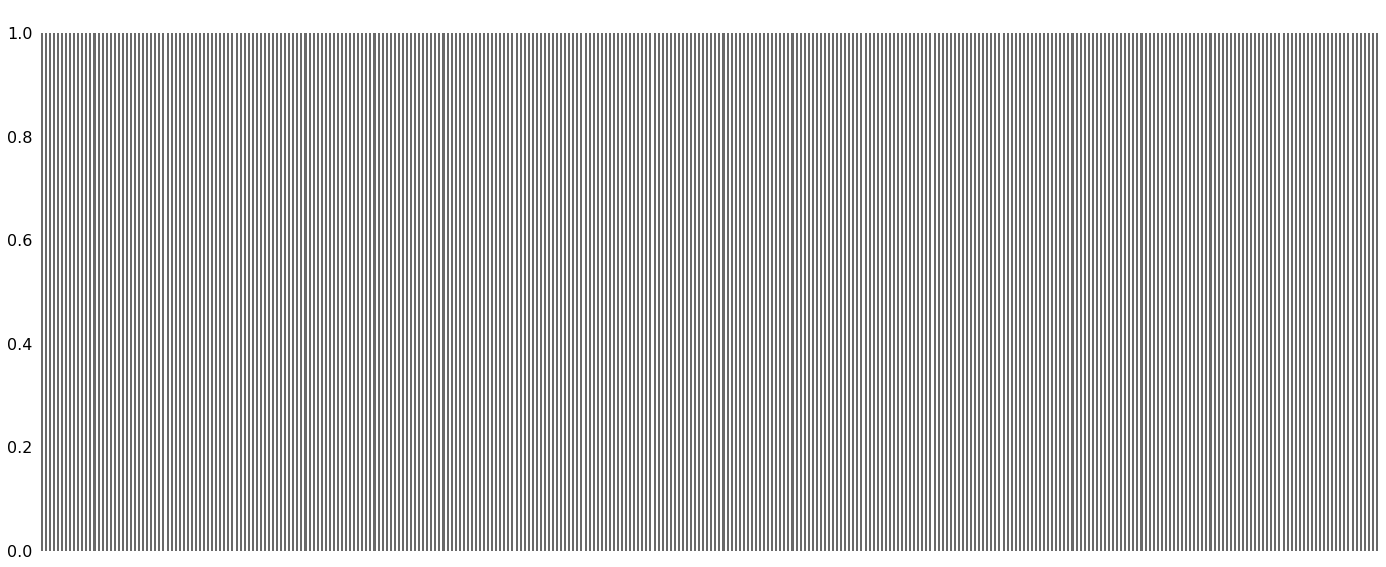

In [9]:
#Todas as variaveis estão preenchidas
#df_pac.isnull().sum()
msno.bar(df_lu)

In [11]:
# É possivel notar que em muitas colunas temos apenas 1 observação preenchida
dados_vazios = (df_lu.isnull().sum()/len(df_lu['id']))*100
#dados_vazios

### Neste ponto traduzimos as classes de acordo com os parametros indicados na apresentação 1
Registros de 1 a 101 a classe é NORMAL <br />
Registros de 102 a 218 a classe é CARDIMIOPATIA DILATADA <br />
Registros de 219 a 401 a classe é  CARTIDIOPATIA HIPERTRÓFICA <br />

In [14]:
for ind, row in df_lu.iterrows():
    if (df_lu.loc[ind,'TARGET']==0): df_lu.loc[ind,'class_desc'] = 'normal'
    if (df_lu.loc[ind,'TARGET']==1): df_lu.loc[ind,'class_desc'] = 'CMH'
    if (df_lu.loc[ind,'TARGET']==2): df_lu.loc[ind,'class_desc'] = 'CMD'

#Verifica a quantidade de cada classe
df_lu['class_desc'].value_counts()

CMH       183
CMD       116
normal    101
Name: class_desc, dtype: int64

# Pré-processamento

In [15]:
#df_pac.dtypes
df_lu.head(3)

,id,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,...,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09,TotalParedeSpharmL10,class_desc
0,id001,29,1,74,110,0,0.0,0.0,21.6,0.0,...,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05,-2.381297e+06,normal
1,id002,31,1,94,126,0,16.1,0.0,133.0,0.0,...,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04,3.576759e+04,normal
2,id003,27,1,92,157,0,33.4,0.0,84.4,0.0,...,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06,8.794934e+06,normal


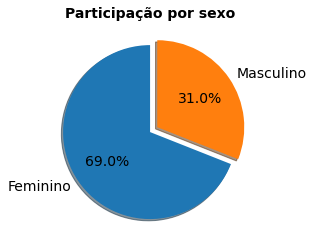

Valores absolutos:


1    276
0    124
Name: sexo, dtype: int64

In [23]:
#Sabemos que sexo é uma variavel importante (conforme pesquisa Fonte), portanto esse 
#desbalanceamento pode ser um problema. Vamos acompanhar ao longo do processo
TOTAL = df_lu.sexo.value_counts()
total_M = TOTAL[1]
total_F = TOTAL[0]

valores = [total_M,total_F]
series = ['Feminino','Masculino']

plt.axis('equal')
plt.rcParams.update({'font.size':14})
plt.rcParams["figure.figsize"] = [5,4]

plt.pie(valores,labels=series,autopct='%1.1f%%',
        explode=(0,0.1),shadow = True,startangle=90,)

plt.title("Participação por sexo",size=14,weight='demibold')
plt.show()

print('Valores absolutos:')
df_lu['sexo'].value_counts()

In [25]:
# Define qual dataset irá utilizar
df_final = df_lu
df_final.head(3)

,id,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,...,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09,TotalParedeSpharmL10,class_desc
0,id001,29,1,74,110,0,0.0,0.0,21.6,0.0,...,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05,-2.381297e+06,normal
1,id002,31,1,94,126,0,16.1,0.0,133.0,0.0,...,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04,3.576759e+04,normal
2,id003,27,1,92,157,0,33.4,0.0,84.4,0.0,...,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06,8.794934e+06,normal


# Definição das classes utilizadas dataset

#### Dado que o numero de observações entre "sem cardiomiopatia" e "com cardimiopatia (em caso de soma CDM+CMH") ficaria desbalanceado, optamos por trabalhar com as classes nomal e CMD

In [26]:
#Verifica a quantidade de cada classe
df_final['class_desc'].value_counts()

CMH       183
CMD       116
normal    101
Name: class_desc, dtype: int64

In [28]:
#Determinando quais classes uremos utilizar
df_final_1 = df_final[df_final['TARGET']!=1]
df_final_1['TARGET'].value_counts()

2    116
0    101
Name: TARGET, dtype: int64

### Deleta campos que não vamos utilizar

In [29]:
df_final_3 = df_final_1
df_final_3.head(3)

,id,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,...,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09,TotalParedeSpharmL10,class_desc
0,id001,29,1,74,110,0,0.0,0.0,21.6,0.0,...,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05,-2.381297e+06,normal
1,id002,31,1,94,126,0,16.1,0.0,133.0,0.0,...,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04,3.576759e+04,normal
2,id003,27,1,92,157,0,33.4,0.0,84.4,0.0,...,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06,8.794934e+06,normal


In [31]:
df_final_4 = df_final_3.drop(['class_desc'],axis = 1)
df_final_4 = df_final_4.drop(['id'],axis = 1)
df_final_4.head(3)

,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,...,TotalParedeSpharmL01,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09,TotalParedeSpharmL10
0,29,1,74,110,0,0.0,0.0,21.6,0.0,15.9,...,-370009.497215,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05,-2.381297e+06
1,31,1,94,126,0,16.1,0.0,133.0,0.0,0.0,...,-141806.576054,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04,3.576759e+04
2,27,1,92,157,0,33.4,0.0,84.4,0.0,0.0,...,-570967.303337,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06,8.794934e+06


In [32]:
#exporta dataset final
df_final_4.to_csv("../RESULTADOS/df_final_20200503.csv", index = False)

# Inicio após exportação

In [33]:
df_final_5 = pd.read_csv("../RESULTADOS/df_final_20200503.csv")
df_final_5.head(3)

,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,...,TotalParedeSpharmL01,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09,TotalParedeSpharmL10
0,29,1,74,110,0,0.0,0.0,21.6,0.0,15.9,...,-370009.497215,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05,-2.381297e+06
1,31,1,94,126,0,16.1,0.0,133.0,0.0,0.0,...,-141806.576054,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04,3.576759e+04
2,27,1,92,157,0,33.4,0.0,84.4,0.0,0.0,...,-570967.303337,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06,8.794934e+06


In [35]:
# sns.heatmap(df_final_5.corr(), annot = True, fmt = '.2f', cmap='Blues')
# plt.title('Correlação features')
# plt.show()

In [86]:
#AJUSTA O DATASET QUE IRÁ UTILIZAR PARA FAZER O PCA
pca_1 = df_final_5
pca_1.head(3)

,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,...,TotalParedeSpharmL01,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09,TotalParedeSpharmL10
0,29,1,74,110,0,0.0,0.0,21.6,0.0,15.9,...,-370009.497215,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05,-2.381297e+06
1,31,1,94,126,0,16.1,0.0,133.0,0.0,0.0,...,-141806.576054,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04,3.576759e+04
2,27,1,92,157,0,33.4,0.0,84.4,0.0,0.0,...,-570967.303337,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06,8.794934e+06


# RODANDO PCA

## Alterar parametro "abordagem_x"

In [87]:
# Separando as fetures por abordagem (define features por abordagem e seta o df da abordagem atual)
abordagem_1 = pca_1.columns[0:-1]
#abordagem_2 = ['idade', 'sexo','volume','massa','soma_endo','soma_epi','soma_parede']

##abordagem 3
# df_info_pac =  pca_1.iloc[:,:7]
# df_edlpar =  pca_1.iloc[:,23:]
# df_abord3 = pd.concat([df_info_pac,df_edlpar],axis=1)
# abordagem_3 = df_abord3.columns[0:-1]


## abordagem 4
abordagem_4 = ['idade', 'sexo','volume','massa']

#Utiliza a abordagem para selecionar as features
abordagem = abordagem_1
feat = abordagem

colunas = feat
df_atual = pca_1.loc[:, colunas]
#df_atual = pd.concat([df_atual,pca_1['TARGET']],axis=1)
df_atual.head(3)

,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,...,TotalParedeSpharmL00,TotalParedeSpharmL01,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09
0,29,1,74,110,0,0.0,0.0,21.6,0.0,15.9,...,6551.098967,-370009.497215,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05
1,31,1,94,126,0,16.1,0.0,133.0,0.0,0.0,...,42009.233272,-141806.576054,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04
2,27,1,92,157,0,33.4,0.0,84.4,0.0,0.0,...,57277.473507,-570967.303337,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06


,principal component 1,principal component 2,TARGET
0,-0.382210,-1.226065,0
1,1.271209,1.001369,0
2,4.141580,0.347055,0


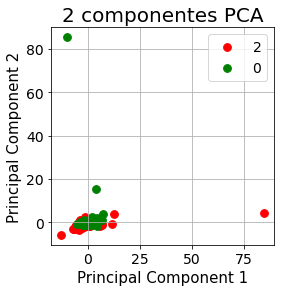

In [88]:
x = pca_1.loc[:, feat].values

# Separa target
y = pca_1.loc[:,['TARGET']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

#dados normalizados
pca_1_normal = pd.DataFrame(data=x,columns = feat)

pca_1_y =  pd.DataFrame(data=y,columns = ['TARGET'])

#pca_1_normal.tail(3)
#pca_1_y.tail(3)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pca_1_y], axis = 1)

fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)

targets = [2, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TARGET'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 60)
ax.legend(targets)
ax.grid()

finalDf.head(3)

In [89]:
total_explicado = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
total_explicado

0.23891722538505542

## Total informações em 2 componentes principais por abordagem:

Abordagem 1
considerando feat = [todos os atributos] = 23% (No gráfico aparentemente não separa bem)<br />


Abordagem 4
considerando feat = [['idade', 'sexo','volume','massa'] = 74%
aparentemente separa bem no Gráfico <br />

# TESTE SELEÇÃO FEATURE

In [90]:
#Total atributos menos o target
total_atributos = len(df_atual.columns) -1

#Para a seleção utilizaremos noss "D" como a raiz quadrada do nosso total
D_caracteristicas = int(np.sqrt(total_atributos))


print(f'TOTAL CARACTERISTICAS: {total_atributos}')
print(f'CARACTERISTICAS UTILIZADAS NA SELEÇÃO DE FEATURES: {D_caracteristicas}')

TOTAL CARACTERISTICAS: 327
CARACTERISTICAS UTILIZADAS NA SELEÇÃO DE FEATURES: 18


# Select Kbest
## Tipo Filtro

O SelectKBest remove todas as features, exceto os recursos de pontuação mais alta para isso conta com aseleção univariada. Ela funciona selecionando os melhores recursos com base em testes estatísticos univariados. Pode ser visto como uma etapa de pré-processamento para um estimador (tipo filtro).

Seus métodos para classificação são: chi2, f_classif, mutual_info_classif

Os métodos baseados no teste F estimam o grau de dependência linear entre duas variáveis aleatórias. Por outro lado, os métodos de informação mútua podem capturar qualquer tipo de dependência estatística, mas, sendo não paramétricos, exigem mais amostras para uma estimativa 

In [91]:
df_atual.head(3)
#df_atual.iloc[217:2]
#217, 2

,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,...,TotalParedeSpharmL00,TotalParedeSpharmL01,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09
0,29,1,74,110,0,0.0,0.0,21.6,0.0,15.9,...,6551.098967,-370009.497215,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05
1,31,1,94,126,0,16.1,0.0,133.0,0.0,0.0,...,42009.233272,-141806.576054,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04
2,27,1,92,157,0,33.4,0.0,84.4,0.0,0.0,...,57277.473507,-570967.303337,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06


In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif


f_classif = SelectKBest(score_func = f_classif,k=D_caracteristicas)
#f_classif = SelectKBest(mutual_info_classif,k=D_caracteristicas)



x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']


fit = f_classif.fit(x,y)


features = fit.transform(x)
#print(features)


colunas = fit.get_support(indices=True)
df_novo = df_atual.iloc[:,colunas]
df_novo


df_novo_c_target = pd.concat([df_novo,df_atual['TARGET']],axis=1)
df_novo_c_target.head(3)

,idade,volume,massa,EDLEndo06,EDLEpi06,EDLTotal06,EDLTotal08,HoughEndo,HoughEpi,OctEndoL0006,OctEndoL0106,OctEpiL0002,OctEpiL0006,OctEpiL0106,OctParedeL0002,OctParedeL0005,OctParedeL0006,OctParedeL0106,TARGET
0,29,74,110,0.0,0.0,0.0,0.0,366,494,-194.455451,-2039.030884,-28.993812,-573.559580,-1712.268189,439.698626,2902.701702,-548.613679,-2763.753505,0
1,31,94,126,0.0,0.0,0.0,0.0,256,339,2261.445944,2962.174569,868.636842,1984.326360,-702.151936,1908.922750,7929.919120,3470.580911,755.222243,0
2,27,92,157,0.0,0.0,0.0,0.0,299,383,2858.188459,-28216.773291,311.170515,3732.801512,50004.429238,1282.719799,7429.050279,5740.225035,56620.924849,0


# Features Importances (com RandomForest)
# Tipo camada

Para este caso escolhemos o classificador e selecionamos as caracteristicas manualmente de acordo com a importancia dada pelo classificador em relação à classe alvo.

In [103]:
from sklearn.ensemble import RandomForestClassifier

x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']

# Treinando o modelo na base inteira
model  = RandomForestClassifier()
model.fit(x, y)

# Verificando a importância decada feature
#model.feature_importances_


feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

feat_select = feature_importances[feature_importances['importance']>0.02]


feat_select

,importance
idade,0.074569
HoughEndo,0.035151
OctParedeL0107,0.032137
volume,0.029237
OctEpiL0107,0.026697
massa,0.022293


In [104]:
df_novo_c_target = pd.concat([df_atual.loc[:,feat_select.index],df_atual['TARGET']],axis=1)
df_atual.loc[:,feat_select.index]

,idade,HoughEndo,OctParedeL0107,volume,OctEpiL0107,massa
0,29,366,-21211.275738,74,-9197.182517,110
1,31,256,-447.330868,94,406.887744,126
2,27,299,-16559.875843,92,-9295.768324,157
3,52,231,-12544.768171,106,-4417.087017,107
4,56,192,-4538.049093,68,-2342.378422,73
...,...,...,...,...,...,...
212,31,239,-13681.284721,97,-7392.371384,110
213,70,407,-28541.286863,161,-16388.278503,298
214,48,259,-22787.744106,176,-13255.936022,223
215,46,387,-39151.554468,261,-22675.626673,315


# RFE: Recursive feature elimination
## Tipo Camada
A eliminação recursiva de recursos (RFE) seleciona subconjuntos recursivamente, considerando conjuntos cada vez menores de features. Primeiro, o estimador é treinado no conjunto inicial de recursos e a importância de cada feature é obtida por meio de um atributo "coef_" ou através de um atributo "feature_importances_". Em seguida, os recursos menos importantes são removidos do conjunto atual de recursos. Esse procedimento é repetido recursivamente no conjunto removido até que o número desejado de recursos a serem selecionados seja finalmente atingido.

O RFECV executa o RFE em um loop de validação cruzada para encontrar o número ideal de recursos.

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']

model = LogisticRegression(max_iter=4000)

rfe = RFE(model,D_caracteristicas)

fit = rfe.fit(x,y)


features = fit.get_support(indices=True)


df_novo_c_target = pd.concat([df_atual.iloc[:,features],df_atual['TARGET']],axis=1)
df_atual.iloc[:,features]

,OctEndoL0005,OctEndoL0006,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEpiL0006,OctEpiL0106,OctEpiL0207,OctEpiL0306,OctEpiL0402,OctParedeL0006,OctParedeL0007,OctParedeL0106,OctParedeL0107,OctParedeL0207,OctParedeL0306,OctParedeL1008,TotalEpiSpharmL10
0,820.994081,-194.455451,23774.492630,-2039.030884,-7820.588517,-573.559580,-1712.268189,127569.837862,398185.489452,6974.476460,-548.613679,-3535.592190,-2763.753505,-21211.275738,157302.541140,3.251874e+05,-1.165122e+06,-1.089046e+06
1,3075.982431,2261.445944,-36073.821620,2962.174569,-323.072481,1984.326360,-702.151936,-1850.317486,1195.952957,-2784.745090,3470.580911,2096.446944,755.222243,-447.330868,-3561.369974,1.358241e+03,2.519901e+05,2.607834e+04
2,3351.210180,2858.188459,-99966.813018,-28216.773291,-5935.553381,3732.801512,50004.429238,3954.056214,524916.727009,836.975253,5740.225035,2205.085028,56620.924849,-16559.875843,-8532.007783,6.847665e+05,-9.088833e+06,1.389241e+07
3,90.637727,-900.983061,-3169.946029,-4822.471114,-3752.639760,-1780.160430,-5915.375560,14620.865324,-4779.113055,-546.526089,-2311.704669,-4448.456389,-9408.749935,-12544.768171,17725.554215,1.202895e+04,1.966020e+05,-5.259236e+03
4,1169.705080,743.837156,-15356.777802,-5940.753069,-2542.879060,447.547877,-6569.781382,-4475.354573,-82.920237,-1148.703868,888.653489,-274.711843,-9551.789314,-4538.049093,-5230.158413,-2.598593e+02,-1.779676e+04,6.245845e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,597.473923,459.335514,64600.553118,8986.581764,-4227.939720,702.422751,58374.853927,67014.306821,283894.380548,-435111.681824,1066.703604,-1449.202722,72823.976094,-13681.284721,633.911901,1.110387e+06,1.673121e+08,-1.441441e+07
213,958.287241,-2576.284182,-33496.847336,-19120.460759,-11568.137344,-3134.138738,-18517.269716,-44835.623555,-15340.204918,248.073894,-4800.926815,-11657.118880,-31742.093843,-28541.286863,-44374.648698,-3.091290e+04,-2.127306e+05,3.133736e+04
214,2779.341296,1645.377830,32947.882035,-15931.394960,-7864.693044,1676.880671,62048.114178,12172.023848,-124713.367925,879.581556,2596.292972,664.960016,65693.809257,-22787.744106,19345.453330,6.387781e+05,7.043410e+06,3.179069e+05
215,2447.934921,-150.112947,125454.963262,23432.432889,-14340.092484,-769.465539,37799.281335,-2874.036688,793129.472787,79758.303281,-817.541969,-10076.318098,60386.538999,-39151.554468,-14679.425821,8.914328e+05,5.923390e+06,3.879443e+03


# Sequential Forward Selection (SFS)
## Tipo: Heurístico
A cada iteração novas
características são adicionadas ao subconjunto
corrente

In [109]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

#Método de distancia utilizada
knn = KNeighborsClassifier(n_neighbors=30)


x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']

sfs1 = SFS(knn, 
           k_features=D_caracteristicas, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x, y)
sfs1.k_feature_names_
#sfs1.k_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 327 out of 327 | elapsed:    4.8s finished

[2020-05-03 23:03:03] Features: 1/18 -- score: 0.8110599078341014[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 326 out of 326 | elapsed:    4.9s finished

[2020-05-03 23:03:08] Features: 2/18 -- score: 0.8433179723502304[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 325 out of 325 | elapsed:    4.7s finished

[2020-05-03 23:03:13] Features: 3/18 -- score: 0.8433179723502304[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('idade',
 'sexo',
 'volume',
 'massa',
 'EDLEndo01',
 'EDLEndo02',
 'EDLEndo04',
 'EDLEndo06',
 'EDLEndo08',
 'EDLEpi01',
 'EDLEpi02',
 'EDLEpi04',
 'EDLEpi06',
 'EDLEpi08',
 'EDLTotal02',
 'EDLTotal04',
 'EDLTotal06',
 'EDLTotal08')

In [116]:
df_novo_c_target = pd.concat([df_atual.iloc[:,list(sfs1.k_feature_idx_)],df_atual['TARGET']],axis=1)
df_atual.iloc[:,list(sfs1.k_feature_idx_)]
#df_novo_c_target

,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo03,EDLEndo05,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi03,EDLEpi05,EDLEpi07,EDLTotal01,EDLTotal03,EDLTotal05,EDLTotal07
0,29,1,74,110,0,0.0,21.6,15.9,168.1,0.0,1.7,46.8,44.1,242.6,0.8,58.5,52.3,357.6
1,31,1,94,126,0,16.1,133.0,0.0,0.0,0.0,40.0,199.0,0.0,0.0,48.0,284.0,0.0,0.0
2,27,1,92,157,0,33.4,84.4,0.0,44.5,0.0,47.9,121.9,7.9,67.0,71.4,177.2,6.2,95.2
3,52,1,106,107,0,0.0,17.4,0.0,131.7,0.0,0.0,41.0,9.9,193.1,0.0,49.0,8.1,269.3
4,56,1,68,73,0,2.7,115.0,0.0,11.7,0.0,9.2,141.9,0.0,38.6,7.9,211.1,0.0,42.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,31,0,97,110,2,0.0,10.0,24.0,95.6,0.0,3.2,24.8,40.3,151.4,2.4,28.2,54.5,208.7
213,70,1,161,298,2,0.0,83.4,0.0,182.8,0.0,0.0,133.3,0.0,239.9,0.0,184.7,0.0,361.0
214,48,0,176,223,2,13.2,53.6,12.1,78.4,0.0,27.3,93.0,37.9,109.7,31.4,116.3,42.1,151.6
215,46,1,261,315,2,2.0,23.6,24.0,220.8,0.0,6.7,54.8,54.7,239.0,7.4,69.0,68.9,382.5


# Sequential Backward Selection (SBS)
## Tipo: Heurístico
A cada iteração
características são deletadas do subconjunto
corrente

In [114]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier


#Método de distancia utilizada
knn = KNeighborsClassifier(n_neighbors=4)

x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']

# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=D_caracteristicas, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(x, y)

sbs.k_feature_names_
#sbs.k_score_


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

('idade',
 'sexo',
 'volume',
 'massa',
 'EDLEndo01',
 'EDLEndo02',
 'EDLEndo03',
 'EDLEndo04',
 'EDLEndo05',
 'EDLEndo06',
 'EDLEndo07',
 'EDLEndo08',
 'EDLEpi01',
 'EDLEpi02',
 'EDLEpi03',
 'EDLEpi04',
 'EDLEpi05',
 'EDLEpi06',
 'EDLEpi07',
 'EDLEpi08',
 'EDLTotal01',
 'EDLTotal02',
 'EDLTotal03',
 'EDLTotal04',
 'EDLTotal05',
 'EDLTotal06',
 'EDLTotal07',
 'EDLTotal08',
 'HoughEndo',
 'HoughEpi',
 'HoughParede',
 'OctEndoL0001',
 'OctEndoL0002',
 'OctEndoL0003',
 'OctEndoL0004',
 'OctEndoL0005',
 'OctEndoL0006',
 'OctEndoL0007',
 'OctEndoL0008',
 'OctEndoL0101',
 'OctEndoL0102',
 'OctEndoL0103',
 'OctEndoL0104',
 'OctEndoL0105',
 'OctEndoL0106',
 'OctEndoL0107',
 'OctEndoL0108',
 'OctEndoL0201',
 'OctEndoL0202',
 'OctEndoL0203',
 'OctEndoL0204',
 'OctEndoL0205',
 'OctEndoL0206',
 'OctEndoL0207',
 'OctEndoL0208',
 'OctEndoL0301',
 'OctEndoL0302',
 'OctEndoL0303',
 'OctEndoL0304',
 'OctEndoL0305',
 'OctEndoL0306',
 'OctEndoL0307',
 'OctEndoL0308',
 'OctEndoL0401',
 'OctEndoL0402',
 'O

In [ ]:
df_novo_c_target = pd.concat([df_atual.iloc[:,list(sbs.k_feature_idx_)],df_atual['TARGET']],axis=1)
df_atual.iloc[:,list(sbs.k_feature_idx_)]

# Roda PCA APÓS SELEÇÃO


In [117]:
feat = df_novo_c_target.columns[0:-1]
feat

pca_2 = df_novo_c_target
x = pca_2.loc[:, feat].values

# Separa target
y = pca_2.loc[:,['TARGET']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

#dados normalizados
pca_2_normal = pd.DataFrame(data=x,columns = feat)

pca_2_y =  pd.DataFrame(data=y,columns = ['TARGET'])




pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pca_2_y], axis = 1)


fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)

targets = [2    , 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TARGET'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 60)
ax.legend(targets)
ax.grid()

finalDf.head(3)

ValueError: Shape of passed values is (217, 19), indices imply (217, 18)

In [569]:
total_explicado = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
total_explicado

0.7931387483613149

In [400]:
#Caracteristicas selecionadas
df_novo_c_target.head(3)

,age,volume,massa,edl_endo_7,edl_par_7,target
0,29,74,110,168.1,357.6,0
1,31,94,126,0.0,0.0,0
2,27,92,157,44.5,95.2,0


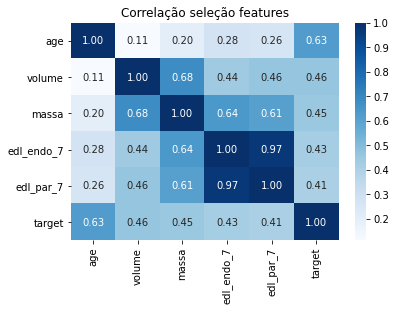

In [401]:
sns.heatmap(df_novo_c_target.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação seleção features')
plt.show()

In [136]:

#1 abordagem = DATASET COMPLETO

#SelectKBest
#D=5
#f_classif
#79%

#D=5
#mutual_info_classif
#79%

#Randon Forest (11 caracteristicas)
#feature_importances['importance']>0.05]
#69%

#RFE
#LogisticRegression(max_iter=20000)
#79%

#SFS
#KNeighborsClassifier(n_neighbors=30)
#60%


# Sequential Backward Selection (SBS)
#KNeighborsClassifier(n_neighbors=10)
#74%